In [1]:
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.manifold import TSNE
from utilities import *

In [2]:
X_train, X_test, y_train, y_test, pd_passthrough_train, pd_passthrough_test = prepare_data(data_subdir="ZMUMU_EGZ_extended_np_pd",format_mode="SuperCell_ET")
iso_X_train, iso_X_test, iso_y_train, iso_y_test, pd_passthrough_train, pd_passthrough_test = prepare_data(data_subdir="ZMUMU_EGZ_extended_iso_vars",format_mode="iso_vars")


found preprepared data in ..\data\ZMUMU_EGZ_extended_np_pd
found preprepared data in ..\data\ZMUMU_EGZ_extended_iso_vars


In [3]:
rbf_SVM_clf = SVC(kernel="rbf", C=1.0,  gamma='scale', random_state=42)
hinge_SGD_clf = SGDClassifier(loss="hinge", max_iter=10000, tol=1e-3, random_state=42, learning_rate="adaptive",eta0=0.1)
bdt_clf = XGBClassifier(random_state=42, tree_method='exact', learning_rate = 0.65)

iso_rbf_SVM_clf = SVC(kernel="rbf", C=1.0,  gamma='scale', random_state=42)
iso_hinge_SGD_clf = SGDClassifier(loss="hinge", max_iter=10000, tol=1e-3, random_state=42, learning_rate="adaptive",eta0=0.1)
iso_bdt_clf = XGBClassifier(random_state=42, tree_method='exact', learning_rate = 0.65)

In [ ]:
bdt_clf.fit(X_train, y_train)
rbf_SVM_clf.fit(X_train, y_train)
hinge_SGD_clf.fit(X_train, y_train)

iso_bdt_clf.fit(iso_X_train, iso_y_train)
iso_rbf_SVM_clf.fit(iso_X_train, iso_y_train)
iso_hinge_SGD_clf.fit(iso_X_train, iso_y_train)

In [ ]:

y_pred_bdt = bdt_clf.predict(X_test)
y_pred_rbf_SVM = rbf_SVM_clf.predict(X_test)
y_pred_hinge_SGD = hinge_SGD_clf.predict(X_test)

iso_y_pred_bdt = iso_bdt_clf.predict(iso_X_test)
iso_y_pred_rbf_SVM = iso_rbf_SVM_clf.predict(iso_X_test)
iso_y_pred_hinge_SGD = iso_hinge_SGD_clf.predict(iso_X_test)

pd_passthrough_test["pred_bdt"] = y_pred_bdt
pd_passthrough_test["pred_rbf_SVM"] = y_pred_rbf_SVM
pd_passthrough_test["pred_hinge_SGD"] = y_pred_hinge_SGD
pd_passthrough_test["iso_pred_bdt"] = iso_y_pred_bdt
pd_passthrough_test["iso_pred_rbf_SVM"] = iso_y_pred_rbf_SVM
pd_passthrough_test["iso_pred_hinge_SGD"] = iso_y_pred_hinge_SGD

evaluate_sklearn_model(y_test, y_pred_bdt, show_CR=False, show_MSE=False, model_name="bdt")
evaluate_sklearn_model(iso_y_test, iso_y_pred_bdt, show_CR=False, show_MSE=False, model_name="bdt (isolation variables)")
evaluate_sklearn_model(y_test, y_pred_rbf_SVM, show_CR=False, show_MSE=False, model_name="rbf_SVM")
evaluate_sklearn_model(iso_y_test, iso_y_pred_rbf_SVM, show_CR=False, show_MSE=False, model_name="rbf_SVM (isolation variables)")
evaluate_sklearn_model(y_test, y_pred_hinge_SGD, show_CR=False, show_MSE=False, model_name="hinge_SGD")
evaluate_sklearn_model(iso_y_test, iso_y_pred_hinge_SGD, show_CR=False, show_MSE=False, model_name="hinge_SGD (isolation variables)")

Evaluation of bdt
Accuracy: 0.9683
Confusion Matrix:
 [[27624   986]
 [  478 17094]]
Evaluation of bdt (isolation variables)
Accuracy: 0.9600
Confusion Matrix:
 [[27342  1268]
 [  579 16993]]
Evaluation of rbf_SVM
Accuracy: 0.9652
Confusion Matrix:
 [[27345  1265]
 [  343 17229]]
Evaluation of rbf_SVM (isolation variables)
Accuracy: 0.9607
Confusion Matrix:
 [[27243  1367]
 [  448 17124]]
Evaluation of hinge_SGD
Accuracy: 0.9425
Confusion Matrix:
 [[26770  1840]
 [  814 16758]]
Evaluation of hinge_SGD (isolation variables)
Accuracy: 0.9497
Confusion Matrix:
 [[26950  1660]
 [  661 16911]]


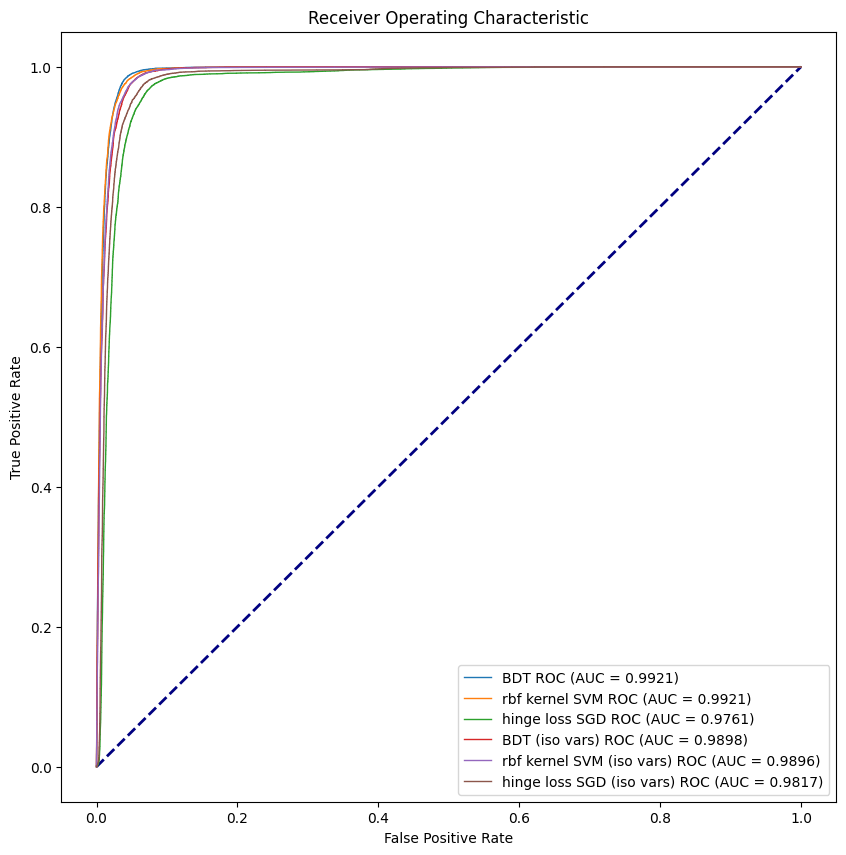

In [ ]:
model_dict = {"BDT":bdt_clf, "rbf kernel SVM":rbf_SVM_clf, "hinge loss SGD":hinge_SGD_clf}
iso_model_dict = {"BDT "+"(iso vars)":iso_bdt_clf, "rbf kernel SVM "+"(iso vars)":iso_rbf_SVM_clf, "hinge loss SGD "+"(iso vars)":iso_hinge_SGD_clf}
multi_roc(model_dict, X_test, y_test, iso_model_dict, iso_X_test, iso_y_test)

In [ ]:
plot_efficiency_vs_ele_PT(pd_passthrough_test, prediction_parameter="pred_"+"rbf_SVM", title_string="rbf kernel SVM")
plot_efficiency_vs_ele_PT(pd_passthrough_test, prediction_parameter="pred_"+"hinge_SGD", title_string="hinge loss SGD")
plot_efficiency_vs_ele_PT(pd_passthrough_test, prediction_parameter="pred_bdt", title_string="BDT")
plot_efficiency_vs_ele_PT(pd_passthrough_test, prediction_parameter="iso_pred_"+"rbf_SVM", title_string="rbf kernel SVM "+"(iso vars)")
plot_efficiency_vs_ele_PT(pd_passthrough_test, prediction_parameter="iso_pred_"+"hinge_SGD", title_string="hinge loss SGD "+"(iso vars)")
plot_efficiency_vs_ele_PT(pd_passthrough_test, prediction_parameter="iso_pred_bdt", title_string="BDT "+"(iso vars)")


In [ ]:
X_test_embedded = TSNE(n_components=2, random_state=42).fit_transform(X_test) 

y_fpfn = np.logical_xor(y_test, y_pred_rbf_SVM)
plot_2D_TSNE(X_test_embedded,y_fpfn,f"t-SNE visualization of the false positives and false negatives for rbf_SVM kernel SVM")
y_fpfn = np.logical_xor(y_test, y_pred_hinge_SGD)
plot_2D_TSNE(X_test_embedded,y_fpfn,f"t-SNE visualization of the false positives and false negatives for hinge_SGD loss SGD")
plot_2D_TSNE(X_test_embedded,np.logical_xor(y_test, y_pred_bdt),f"t-SNE visualization of the false positives and false negatives for BDT")

iso_X_test_embedded = TSNE(n_components=2, random_state=42).fit_transform(iso_X_test) 

y_fpfn = np.logical_xor(iso_y_test, iso_y_pred_rbf_SVM)
plot_2D_TSNE(iso_X_test_embedded,y_fpfn,f"t-SNE visualization of the false positives and false negatives for rbf_SVM kernel SVM "+"(iso vars)")
y_fpfn = np.logical_xor(iso_y_test, iso_y_pred_hinge_SGD)
plot_2D_TSNE(iso_X_test_embedded,y_fpfn,f"t-SNE visualization of the false positives and false negatives for hinge_SGD loss SGD "+"(iso vars)")
plot_2D_TSNE(iso_X_test_embedded,np.logical_xor(iso_y_test, iso_y_pred_bdt),f"t-SNE visualization of the false positives and false negatives for BDT "+"(iso vars)")